In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py
import healpy as hp
import time

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting
from ulmo.analysis import spatial_plots as sp

# Load Info

In [35]:
tbl = ulmo_io.load_main_table( 's3://viirs/Tables/VIIRS_2012_std.parquet')
cloudy_2012 = tbl[ (tbl.clear_fraction > 0.045) ]
clear_2012 = tbl[ (tbl.clear_fraction < 0.005) ]

Read main table: s3://viirs/Tables/VIIRS_2012_std.parquet


In [36]:
tbl = ulmo_io.load_main_table( 's3://viirs/Tables/VIIRS_2013_std.parquet')
cloudy_2013 = tbl[ (tbl.clear_fraction > 0.045) ]
clear_2013 = tbl[ (tbl.clear_fraction < 0.005) ]

Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet


In [37]:
tbl = ulmo_io.load_main_table( 's3://viirs/Tables/VIIRS_2014_std.parquet')
cloudy_2014 = tbl[ (tbl.clear_fraction > 0.045) ]
clear_2014 = tbl[ (tbl.clear_fraction < 0.005) ]

Read main table: s3://viirs/Tables/VIIRS_2014_std.parquet


In [38]:
tbl = ulmo_io.load_main_table( 's3://viirs/Tables/VIIRS_2015_std.parquet')
cloudy_2015 = tbl[ (tbl.clear_fraction > 0.045) ]
clear_2015 = tbl[ (tbl.clear_fraction < 0.005) ]

Read main table: s3://viirs/Tables/VIIRS_2015_std.parquet


In [39]:
tbl = ulmo_io.load_main_table( 's3://viirs/Tables/VIIRS_2016_std.parquet')
cloudy_2016 = tbl[ (tbl.clear_fraction > 0.045) ]
clear_2016 = tbl[ (tbl.clear_fraction < 0.005) ]

Read main table: s3://viirs/Tables/VIIRS_2016_std.parquet


In [40]:
tbl = ulmo_io.load_main_table( 's3://viirs/Tables/VIIRS_2017_std.parquet')
cloudy_2017 = tbl[ (tbl.clear_fraction > 0.045) ]
clear_2017 = tbl[ (tbl.clear_fraction < 0.005) ]

Read main table: s3://viirs/Tables/VIIRS_2017_std.parquet


In [41]:
tbl = ulmo_io.load_main_table( 's3://viirs/Tables/VIIRS_2018_std.parquet')
cloudy_2018 = tbl[ (tbl.clear_fraction > 0.045) ]
clear_2018 = tbl[ (tbl.clear_fraction < 0.005) ]

Read main table: s3://viirs/Tables/VIIRS_2018_std.parquet


In [42]:
tbl = ulmo_io.load_main_table( 's3://viirs/Tables/VIIRS_2019_std.parquet')
cloudy_2019 = tbl[ (tbl.clear_fraction > 0.045) ]
clear_2019 = tbl[ (tbl.clear_fraction < 0.005) ]

Read main table: s3://viirs/Tables/VIIRS_2019_std.parquet


In [43]:
tbl = ulmo_io.load_main_table( 's3://viirs/Tables/VIIRS_2020_std.parquet')
cloudy_2020 = tbl[ (tbl.clear_fraction > 0.045) ]
clear_2020 = tbl[ (tbl.clear_fraction < 0.005) ]

Read main table: s3://viirs/Tables/VIIRS_2020_std.parquet


# Make Tables

In [44]:
clear_tbl = pd.concat( [clear_2012, clear_2013, clear_2014, clear_2015, clear_2016, clear_2017, clear_2018, clear_2019, clear_2020] )

In [45]:
cloudy_tbl = pd.concat( [cloudy_2012, cloudy_2013, cloudy_2014, cloudy_2015, cloudy_2016, cloudy_2017, cloudy_2018, cloudy_2019, cloudy_2020] )

# Plot Hist

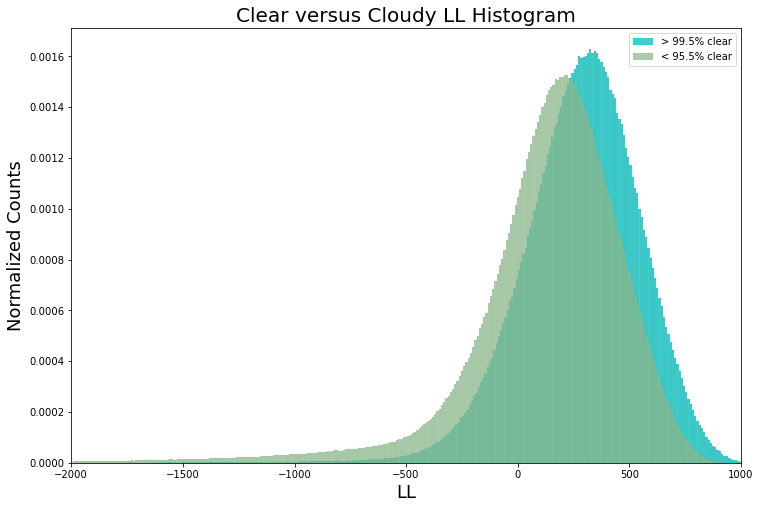

In [52]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
_ = sns.histplot(clear_tbl, x='LL', label='> 99.5% clear', ax=ax, stat = 'density' , color='c', binwidth = 10 )
_ = sns.histplot(cloudy_tbl, x='LL', label='< 95.5% clear', ax=ax, stat = 'density' , color='darkseagreen', binwidth = 10 )

ax.legend()
ax.set_xlim(-2000., 1000.)
ax.set_title('Clear versus Cloudy LL Histogram', fontsize = 20)
ax.set_ylabel('Normalized Counts', fontsize = 18)
ax.set_xlabel('LL', fontsize = 18)

#plt.savefig( 'LL_hist_VIIRS_clouds', dpi = 300)

In [53]:
pwd

'/home/jovyan/ulmo/ulmo/analysis'